In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_new=pd.read_csv('new_data_with_temp.csv')
df_new = df_new.drop('Unnamed: 0', 1)
df_new = df_new.rename(columns={'Website Category Names': 'Crime_type'})

In [3]:
df_location=pd.read_csv('Suburb Location.csv')
df_location = df_location.drop('Unnamed: 0', 1)

In [4]:
location_dic = df_location.to_dict('records')

In [5]:
location_lat = []
location_lon = []
for i in list(df_new.Suburb.values):
    if i in list(df_location.Subrub_Name.values):
        for k in range(len(location_dic)):
            if i == location_dic[k]['Subrub_Name']:
                location_lat.append(location_dic[k]['Latitude'])
                location_lon.append(location_dic[k]['Longitude'])
    else:
        location_lat.append('Non')
        location_lon.append('Non')

In [6]:
df_new['Latitude'] = location_lat
df_new['Longitude'] = location_lon

In [7]:
df_new 

,Suburb,Crime_type,Month,Count,AvgMinTemp,AvgMaxTemp,AvgDailyRainfall,Latitude,Longitude
0,Abba River,Non-Dwelling Burglary,3,1.0,16.1,30.695667,0.34,-23.992438,134.050443
1,Abba River,Non-Dwelling Burglary,7,0.0,9.7,26.951612,0.19,-23.992438,134.050443
2,Abba River,Non-Dwelling Burglary,11,0.0,23.7,39.006450,2.25,-23.992438,134.050443
3,Abba River,Non-Dwelling Burglary,1,0.0,23.2,36.046715,2.36,-23.992438,134.050443
4,Abba River,Non-Dwelling Burglary,0,0.0,24.7,39.706450,2.38,-23.992438,134.050443
...,...,...,...,...,...,...,...,...,...
85387,Zanthus,Property Damage,2,1.0,17.4,30.203226,1.58,-31.035110,123.577490
85388,Zanthus,Property Damage,4,0.0,11.1,20.677420,0.67,-31.035110,123.577490
85389,Zanthus,Property Damage,10,0.0,15.2,30.746666,1.20,-31.035110,123.577490
85390,Zanthus,Property Damage,9,0.0,13.1,29.300259,0.99,-31.035110,123.577490


In [8]:
df_Website_Category_Names = df_new[["Crime_type"]]

In [9]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_crime_1hot = cat_encoder.fit_transform(df_Website_Category_Names)
df_crime_1hot.toarray()

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [10]:
#df_new['Suburb'] = df_crime_1hot.toarray()
df_new['Crime_type'] = df_crime_1hot.toarray()

In [11]:
df_new=df_new.drop("Suburb", axis=1)

In [12]:
df_new

,Crime_type,Month,Count,AvgMinTemp,AvgMaxTemp,AvgDailyRainfall,Latitude,Longitude
0,0.0,3,1.0,16.1,30.695667,0.34,-23.992438,134.050443
1,0.0,7,0.0,9.7,26.951612,0.19,-23.992438,134.050443
2,0.0,11,0.0,23.7,39.006450,2.25,-23.992438,134.050443
3,0.0,1,0.0,23.2,36.046715,2.36,-23.992438,134.050443
4,0.0,0,0.0,24.7,39.706450,2.38,-23.992438,134.050443
...,...,...,...,...,...,...,...,...
85387,0.0,2,1.0,17.4,30.203226,1.58,-31.035110,123.577490
85388,0.0,4,0.0,11.1,20.677420,0.67,-31.035110,123.577490
85389,0.0,10,0.0,15.2,30.746666,1.20,-31.035110,123.577490
85390,0.0,9,0.0,13.1,29.300259,0.99,-31.035110,123.577490


In [13]:
# Split the data by 95/5
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_new, test_size = 0.05, random_state = 0)

# unscaled data
X_train=train_set.drop("Count",axis=1).values
Y_train=train_set["Count"].values

X_test=test_set.drop("Count",axis=1).values
Y_test=test_set["Count"].values

In [14]:
# prepare data for machine learning 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#scaled data
scale_fit = scaler.fit(X_train)
X_train_scaled = scale_fit.transform(X_train)
X_test_scaled = scale_fit.transform(X_test)

In [18]:
from sklearn.svm import SVR
regr = SVR(kernel = 'rbf', epsilon=2)
pred_svr = regr.fit(X_train_scaled, Y_train).predict(X_test_scaled)

In [19]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, pred_svr)    # 19.08607075994409   34min

19.32029339786509

In [22]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred_svr)

-0.029387511988862025

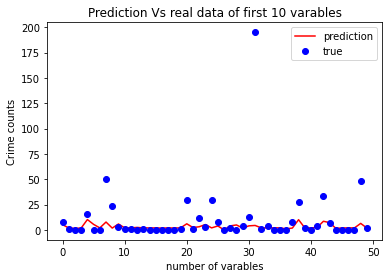

In [20]:
import numpy as np
import matplotlib.pyplot as plt
  

prediction = pred_svr[100:150]
  
true = Y_test[100:150]
  
# Function to plot  
plt.plot(prediction, 'r-', label ='prediction')
plt.plot(true, 'bo', label ='true')
  
# Function add a legend  
plt.legend()
plt.title('Prediction Vs real data')
plt.xlabel('number of varables')
plt.ylabel('Crime counts')
  
# function to show the plot
plt.show()